Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 5 - Regressão e Classificação com Modelos Lineares

Nome: Wilson Castello Branco Neto

Exemplo/Atividade 2: Regressão linear multivariada com dados sobre seguro saúde

Monte o drive, leia o arquivo disponibilizado no site e apresente seus dados

Verifique se existe algum valor nulo no conjunto. Caso exista apague as linhas correspondentes.

Como existem três atributos qualitativos, eles devem ser convertidas em valores quantitativos para serem incorporados ao modelo. Embora todos eles sejam nominais, não use o método **get_dummies** do Pandas, que é o mais indicado neste caso para gerar uma representação binária. Use o **LabelEnconder** para gerar um código numérico para cada valor, de forma a não gerar colunas extras visando simplificar os cálculos solicitados posteriormente.

Crie um novo dataframe denominado df2 para não sobrepor os dados originais que serão usados posteriormente. Em seguida apresente o novo dataframe.

Para criar um modelo considerando todos os atributos disponíveis como variáveis independentes (exceto o atributo **charges** que é o que se deseja estimar) deve-se:
1. Armazenar os dados de todas as colunas, exceto da coluna charges, na variável X, que é uma lista de listas.
2. Armazenar os dados da coluna charges na variável y, que é uma lista de valores numéricos.
3. Usar a função train_test_split para dividir os dados em 67% para o conjunto de treinamento e 33% para o conjunto de teste.

A lista X é divida em X_train e X_test, e a lista y em y_train e y_test. O parâmetro shuffle indica que a divisão será aleatória e não sequencial e o parâmetro random_state indica o valor inicial da aleatorização (semente) para poder repetir os mesmos valores em diferentes execuções.

In [ ]:
from sklearn.model_selection import train_test_split

X = df2.drop(['charges'] ,axis='columns')
y = df2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print('X - Treinamento: ')
print(X_train)
print('Y - Treinamento: ')
print(y_train)
print('X - Teste: ')
print(X_test)
print('Y -Teste: ')
print(y_test)


X - Treinamento: 
      age  sex     bmi  children  smoker  region
1046   43    0  25.080         0       0       0
682    39    1  35.300         2       1       3
1037   45    0  30.495         1       1       1
490    19    0  32.900         0       0       3
39     60    1  39.900         0       1       3
...   ...  ...     ...       ...     ...     ...
1095   18    0  31.350         4       0       0
1130   39    0  23.870         5       0       2
1294   58    1  25.175         0       0       0
860    37    0  47.600         2       1       3
1126   55    1  29.900         0       0       3

[896 rows x 6 columns]
Y - Treinamento: 
1046     7325.04820
682     40103.89000
1037    39725.51805
490      1748.77400
39      48173.36100
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 896, dtype: float64
X - Teste: 
      age  sex     bmi  children  smoker  region
764    45    0  25.175      

1. Cria o modelo;
2. Treina o modelo, a partir dos dados de treinamento;
3. Calcula os valores o conjunto de teste;
4. Apresenta os coeficientes da reta;
5. Calcula e apresenta o coeficiente de determinação (r2).
6. Calcula e apresenta o erro médio quadrado (mse).

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ",mse)

Coeficientes da reta: 

a =  [  262.00518915   129.10270377   342.2658478    373.20803797
 23693.32775546  -294.4964067 ]
b =  -12368.529203578068
Coeficiente de determinação:  0.7602640802497018
Erro quadrado médio:  35132017.869487904


Calcula o custo, a partir dos coeficientes do modelo para uma pessoa com as seguintes características:
1.   Age: 50;
2.   Sex: 1 (Male)
3.   BMI: 30
4.   Children: 2
5.   Smoker: 1 (yes)
6.   Region: 1 (northwest)

In [ ]:
seguro = 262.00518915 * 50 + 129.10270377 * 1 + 342.2658478 * 30 + 373.20803797 * 2 + 23693.32775546 * 1 + -294.4964067 * 1 + -12368.529203578068

print(f'Valor do seguro: {seguro:.2f}')


Valor do seguro: 35274.06


Calcula o valor previsto para o seguro usando o método **predict** do modelo criado. São passados por parâmetro os dados de duas pessoas, uma com os mesmos valores do cálculo acima e outra alterando o valor do atributo **smoker** de *yes* para *no*.

In [ ]:
seguro = modelo.predict([[50,1,30,2,1,1],[50,1,30,2,0,1]])
print(f'Valor do seguro da pessoa 1: {seguro[0]:.2f}')
print(f'Valor do seguro da pessoa 2: {seguro[1]:.2f}')

Valor do seguro da pessoa 1: 35274.06
Valor do seguro da pessoa 2: 11580.73


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


No modelo criado, foram utilizados todos os atributos existentes no dataset. Abaixo, a relevância de cada atributo é analisada e um novo modelo criado visando reduzir a possibilidade de overfitting.

Calcule os coeficientes de correlação e gere o mapa de calor para analisar a relação entre as variáveis quantitativas.

Como a variável **age** foi a que apresentou a maior correlação, gere um diagrama de dispersão para compreender melhor esta relação.

Analisando o diagrama de dispersão acima, é possível perceber que o atributo idade influencia no valor a ser pago, mas existem "três grupos" que devem ser influenciadas por outras variáveis.

Provavelmente, alguma variável qualitativa é responsável por esta divisão. Uma forma de identificar qual é a variável e apresentar as médias do custo do seguro saúde para cada categoria de uma variável, por meio de uma tabela ou de um gráfico de colunas ou barras, como foi feito na aula 4.

Outra possibilidade é incoporar estas variáveis no próprio diagrama de dispersão, usando cores diferentes para representar valores diferentes da variável qualitativa. Abaixo são gerados alguns outros diagramas de dispersão relacionando idade e valor pago, porém com cores para diferenciar as categorias de outras variáveis que podem estar influenciando no resultado.

Digrama de dispersão relacionando a idade, custo do seguro e a região da pessoa.

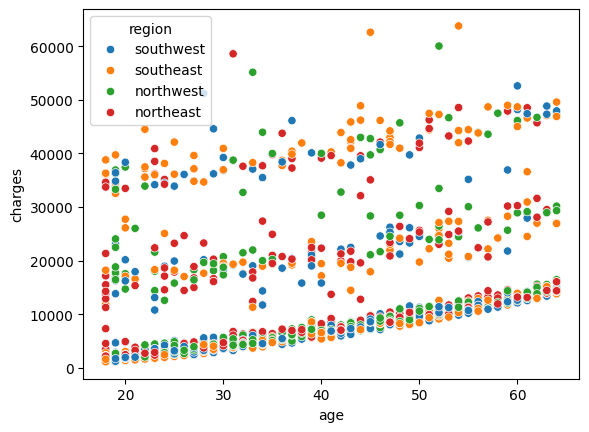

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="age", y="charges", hue="region", data=df)
plt.show()

Crie um diagrama de dispersão relacionando idade, custo do seguro e o sexo.

Crie um diagrama de dispersão relacionando idade, custo do seguro e se a pessoa é fumante ou não.

Analisando os gráficos percebe-se que a variável smoker (se é fumante ou não) é que mais diferencia os elementos, por isto vamos incluí-la ao modelo, junto com a idade.

Crie um nova cópia do dataframe original e salve em df3 e codifique o atributo **smoker** usando o labelEncoder. Por fim, apresente o dataframe.

Crie um novo conjunto de dados (X e y) apenas com as variáveis **age** e **smoker**, divida-o em dados de treinamento e teste (use os mesmos parâmetros da divisão feita anteriormente) e apresenta os conjuntos.

Treine o modelo com os novos dados, calcule e apresente os coeficientes da reta e o r2 . Compare o valor obtido por este modelo com o primeiro treinado com todos os atributos.

Considerando que o atributo **bmi** possui uma pequena correlação com **charges**, vamos analisar o diagrama de dispersão que relaciona estas duas variáveis, considerando o atributo **sex** também.

Pelo gráfico percebe-se que para as pessoas não fumantes a alteração no **bmi** não leva a mudanças no custo do seguro, mas para as fumantes sim.

Crie um novo conjunto de dados (X e y) apenas com as variáveis **age**, **bmi** e **smoker**, divida-o em dados de treinamento e teste (use os mesmos parâmetros da divisão feita anteriormente) e apresenta os conjuntos.

Crie e treine o novo modelo com os três atributos. Apresente os coeficientes da reta e o r2 e compare-o com os modelos anteriores.